In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.stats import entropy


def load_features(gcn_path: str, contrastive_path: str):
    """
    Load feature embeddings from NumPy files.
    
    Args:
        gcn_path (str): Path to the GCN feature file.
        contrastive_path (str): Path to the contrastive learning feature file.
    
    Returns:
        tuple: (GCN feature matrix, Contrastive learning feature matrix)
    """
    return np.load(gcn_path), np.load(contrastive_path)


def compute_tsne(features: np.ndarray, n_components: int = 2, random_state: int = 42):
    """
    Perform t-SNE dimensionality reduction.

    Args:
        features (np.ndarray): High-dimensional feature matrix.
        n_components (int, optional): Number of dimensions to reduce to. Defaults to 2.
        random_state (int, optional): Random seed for reproducibility. Defaults to 42.

    Returns:
        np.ndarray: Reduced feature matrix (2D).
    """
    return TSNE(n_components=n_components, random_state=random_state).fit_transform(features)


def normalize_to_unit_circle(features_2d: np.ndarray):
    """
    Normalize features to the unit circle (S¹).

    Args:
        features_2d (np.ndarray): 2D feature matrix.

    Returns:
        np.ndarray: Normalized 2D feature matrix.
    """
    return features_2d / np.linalg.norm(features_2d, axis=1, keepdims=True)


def plot_kde(features: np.ndarray, figsize: tuple = (3, 3)):
    """
    Plot the Kernel Density Estimation (KDE) heatmap.

    Args:
        features (np.ndarray): 2D feature matrix.
        figsize (tuple, optional): Figure size. Defaults to (3, 3).
    """
    plt.figure(figsize=figsize)
    sns.kdeplot(
        x=features[:, 0],
        y=features[:, 1],
        fill=True,
        cmap="GnBu",
        levels=70,  # More contour lines for better visualization
        bw_adjust=0.1,  # Smaller bandwidth for finer density
        thresh=0.0001  # Remove extremely low-density areas
    )
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.tick_params(direction='in', length=2, width=1)
    
    for spine in plt.gca().spines.values():
        spine.set_linewidth(1)
    
    plt.show()


def compute_entropy_2d(features_2d: np.ndarray, bins: int = 50) -> float:
    """
    Compute the Shannon entropy of the 2D feature distribution.

    Args:
        features_2d (np.ndarray): 2D feature matrix.
        bins (int, optional): Number of bins for histogram. Defaults to 50.

    Returns:
        float: Shannon entropy value.
    """
    hist, _, _ = np.histogram2d(features_2d[:, 0], features_2d[:, 1], bins=bins, density=True)
    prob = hist / np.sum(hist)  # Normalize histogram to probability distribution
    prob = prob[prob > 0]  # Remove zero-probability entries to avoid log(0)
    return entropy(prob.flatten())  # Compute Shannon entropy

d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


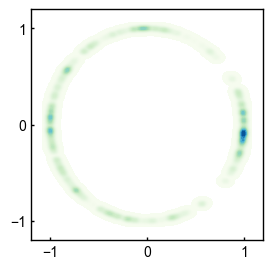

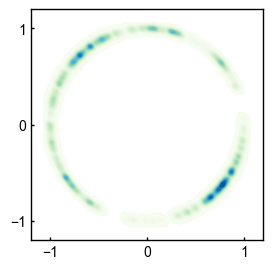

Entropy (GCN): 5.9060
Entropy (Contrastive Learning): 5.9682


In [2]:
if __name__ == "__main__":
    # Load features
    gcn_features, contrastive_features = load_features(
        "./data/S2-5/Fdataset_noCL.npy",
        "./data/S2-5/Fdataset_CL.npy"
    )

    # Compute t-SNE
    gcn_tsne = compute_tsne(gcn_features)
    contrastive_tsne = compute_tsne(contrastive_features)

    # Normalize to unit circle
    gcn_tsne_norm = normalize_to_unit_circle(gcn_tsne)
    contrastive_tsne_norm = normalize_to_unit_circle(contrastive_tsne)

    # Set global font style
    plt.rcParams["font.family"] = "Arial"

    # Plot KDE density maps
    plot_kde(gcn_tsne_norm)
    plot_kde(contrastive_tsne_norm)

    # Compute entropy for feature distributions
    entropy_gcn = compute_entropy_2d(gcn_tsne)
    entropy_contrastive = compute_entropy_2d(contrastive_tsne)

    # Print entropy values
    print(f"Entropy (GCN): {entropy_gcn:.4f}")
    print(f"Entropy (Contrastive Learning): {entropy_contrastive:.4f}")

d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


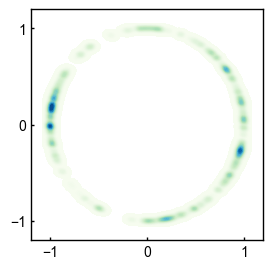

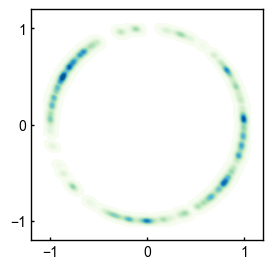

Entropy (GCN): 5.8576
Entropy (Contrastive Learning): 6.0299


In [3]:
if __name__ == "__main__":
    # Load features
    gcn_features, contrastive_features = load_features(
        "./data/S2-5/Cdataset_noCL.npy",
        "./data/S2-5/Cdataset_CL.npy"
    )

    # Compute t-SNE
    gcn_tsne = compute_tsne(gcn_features)
    contrastive_tsne = compute_tsne(contrastive_features)

    # Normalize to unit circle
    gcn_tsne_norm = normalize_to_unit_circle(gcn_tsne)
    contrastive_tsne_norm = normalize_to_unit_circle(contrastive_tsne)

    # Set global font style
    plt.rcParams["font.family"] = "Arial"

    # Plot KDE density maps
    plot_kde(gcn_tsne_norm)
    plot_kde(contrastive_tsne_norm)

    # Compute entropy for feature distributions
    entropy_gcn = compute_entropy_2d(gcn_tsne)
    entropy_contrastive = compute_entropy_2d(contrastive_tsne)

    # Print entropy values
    print(f"Entropy (GCN): {entropy_gcn:.4f}")
    print(f"Entropy (Contrastive Learning): {entropy_contrastive:.4f}")

d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\CAGCN\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


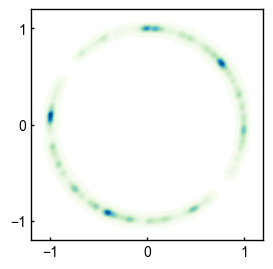

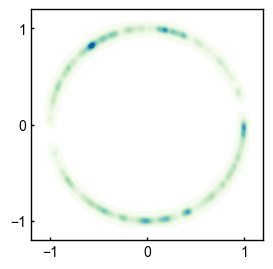

Entropy (GCN): 5.9426
Entropy (Contrastive Learning): 6.1983


In [4]:
if __name__ == "__main__":
    # Load features
    gcn_features, contrastive_features = load_features(
        "./data/S2-5/LRSSL_noCL.npy",
        "./data/S2-5/LRSSL_CL.npy"
    )

    # Compute t-SNE
    gcn_tsne = compute_tsne(gcn_features)
    contrastive_tsne = compute_tsne(contrastive_features)

    # Normalize to unit circle
    gcn_tsne_norm = normalize_to_unit_circle(gcn_tsne)
    contrastive_tsne_norm = normalize_to_unit_circle(contrastive_tsne)

    # Set global font style
    plt.rcParams["font.family"] = "Arial"

    # Plot KDE density maps
    plot_kde(gcn_tsne_norm)
    plot_kde(contrastive_tsne_norm)

    # Compute entropy for feature distributions
    entropy_gcn = compute_entropy_2d(gcn_tsne)
    entropy_contrastive = compute_entropy_2d(contrastive_tsne)

    # Print entropy values
    print(f"Entropy (GCN): {entropy_gcn:.4f}")
    print(f"Entropy (Contrastive Learning): {entropy_contrastive:.4f}")